In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import csv
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/ground truth data/ground_truth_subjects.csv", header = None)
subjects = df[0].values

In [4]:
def get_file_paths(subjects):
    # List that stores path to CSV training files
    file_paths = [] # Initiated list for storing path to dataset
    for subject in subjects:
        # ground_truth -> subject -> peizo signals

        piezo_path = f"/content/drive/MyDrive/ground truth data/ground_truth/{subject}/{subject[10:]}.csv"
        # ground_truth -> subject -> breathrates

        breath_path = f"/content/drive/MyDrive/ground truth data/ground_truth/{subject}/breathrates.csv"
        # ground_truth -> subject -> heartrates

        heart_path = f"/content/drive/MyDrive/ground truth data/ground_truth/{subject}/heartrates.csv"
        # ground_truth -> subject -> jpeaks

        jpeaks_path = f"/content/drive/MyDrive/ground truth data/ground_truth/{subject}/jpeaks.csv"
        # ground_truth -> subject -> movementvalues
        file_paths.append((piezo_path, breath_path, heart_path, jpeaks_path))
    return file_paths

# Training + Testing dataset addresses stored
file_paths = get_file_paths(subjects)
print(file_paths)



[('/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526417507/1526417507.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526417507/breathrates.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526417507/heartrates.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526417507/jpeaks.csv'), ('/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526591202/1526591202.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526591202/breathrates.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526591202/heartrates.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject39_1526591202/jpeaks.csv'), ('/content/drive/MyDrive/ground truth data/ground_truth/Subject42_1527280030/1527280030.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject42_1527280030/breathrates.csv', '/content/drive/MyDrive/ground truth data/ground_truth/Subject42_1527

# Cumulative breathrate and heartrate

In [ ]:
interval = 6780
cumu_breathrates = []
cumu_heartrates = []
cumu_piezo = []
## considering only first 4 datasets

for sub in range(4):

    piezo_0 = pd.read_csv(file_paths[sub][0], header = None).iloc[:, 0].values # Numpy 1D array
    breathrates = pd.read_csv(file_paths[sub][1], header = None).iloc[:, 1].values # Numpy 1D array
    heartrates = pd.read_csv(file_paths[sub][2], header=None).iloc[:, 1].values

    cumu_breathrates += list(breathrates)
    cumu_heartrates += list(heartrates)

    x = [] ## 8 membered list - Averaged out peizo

    for i in range(8):
        sum = 0
        count = 0
        for  j in range(interval):
            if (piezo_0[j + interval * i]>200):
                sum += piezo_0[j + interval * i]
                count += 1

        sum /= count
        x += [sum]

    cumu_piezo += x

Eliminating out of bound piezo values

In [ ]:
## remove piezo values that are y = -1 for heartrates
new_piezoh = []

new_heartrates = []
count = 0
for elem in np.array(cumu_heartrates):
    count +=1
    if (elem==-1):
        continue
    new_heartrates += [elem]
    new_piezoh += [np.array(cumu_piezo)[count-1]]



## print(newX)
## print(newy)
new_piezoh = np.array(new_piezoh)
new_heartrates = np.array(new_heartrates)

f = plt.figure()
f.set_figwidth(4)
f.set_figheight(4)

plt.scatter(new_piezoh, new_heartrates, color = "red")


m, b = np. polyfit(new_piezoh,new_heartrates, 1)
plt.plot(new_piezoh, m*new_piezoh+ b)
plt.show()

In [ ]:
 new_heartrates= new_heartrates.reshape(30, 1)
 new_heartrates


In [ ]:
new_piezoh= new_piezoh.reshape(-1, 1)
new_piezoh

# Applying Linear regressor model on piezo values

In [ ]:
regressor_heart = LinearRegression()
regressor_heart.fit(new_piezoh, new_heartrates)

In [ ]:
pred_data = []
cumu_heartrates =[]
## considering first 4 dataset

for file in range(4, 6, 1):
    piezo_0 = pd.read_csv(file_paths[sub][0], header = None).iloc[:, 0].values # Numpy 1D array
    heartrates = pd.read_csv(file_paths[sub][2], header = None).iloc[:, 1].values # Numpy 1D array

    cumu_heartrates += list(heartrates)
    x = [] ## 8 membered list - Averaged out peizo

    ## average the peizo
    for i in range(8):
        sum = 0
        count = 0
        for  j in range(interval):
            if (piezo_0[j + interval * i]>200):
                sum += piezo_0[j + interval * i]
                count += 1

        sum /= count
        x += [sum]

    pred_data += x

pred_data = np.array(pred_data)
actual_heartrate = np.array(cumu_heartrates)
print(pred_data)
print(actual_heartrate)


In [ ]:
pred_final_heart=regressor_heart.predict(new_piezoh)
print(pred_final_heart)

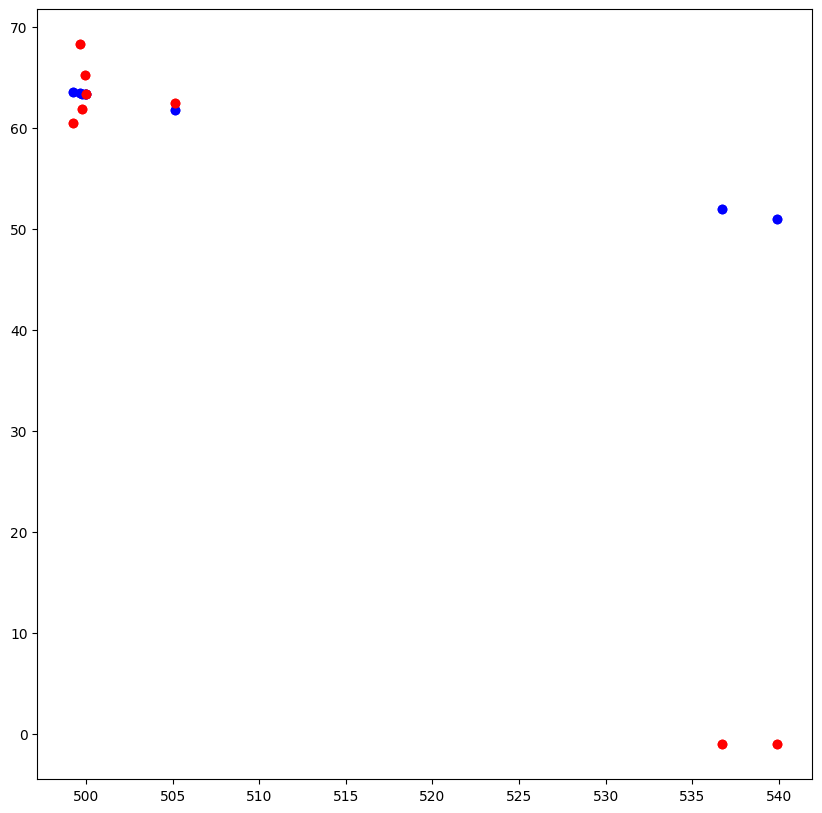

In [58]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

pred_final_heart = regressor_heart.predict(pred_data.reshape(-1, 1))
## print(pred_final)
plt.scatter(pred_data.reshape(-1, 1), pred_final_heart.reshape(-1, 1), color = "blue")
plt.scatter(pred_data.reshape(-1, 1), actual_heartrate.reshape(-1, 1), color = "red")
plt.show()

## BLUE points Predicted values of heartrates
## RED points Actual values of heartrates

In [56]:
pred_final_heart


array([[51.01324655],
       [63.61040087],
       [63.47790163],
       [61.78624433],
       [52.00652189],
       [63.39704148],
       [63.43448096],
       [63.37220358],
       [51.01324655],
       [63.61040087],
       [63.47790163],
       [61.78624433],
       [52.00652189],
       [63.39704148],
       [63.43448096],
       [63.37220358]])

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

Split piezo values and heartrates into train test using  train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(new_piezoh.reshape(-1, 1), new_heartrates,test_size=0.2,random_state=0)

Linear regressor

In [59]:
linear_regressor_heart = LinearRegression()
linear_regressor_heart.fit(X_train,y_train)

LinearRegression()

In [60]:
pred_final_heart2=linear_regressor_heart.predict(X_test)
print(pred_final_heart2)

[[67.1841556 ]
 [63.47329455]
 [65.89578876]
 [65.75436403]
 [61.80322898]
 [63.65154431]]


In [61]:
mse_linearreg = mean_squared_error(y_test, pred_final_heart2)
mse_linearreg

12.39842444953248

Decision tree regressor

In [40]:

decision_regressor_heart = DecisionTreeRegressor()
decision_regressor_heart.fit(X_train,y_train)


DecisionTreeRegressor()

In [30]:
pred_final_heart3=decision_regressor_heart.predict(X_test)
print(pred_final_heart3)

[67.97 65.23 68.83 69.36 63.36 68.31]


In [54]:
mse_decisiontree = mean_squared_error(y_test, pred_final_heart3)
mse_decisiontree

18.847883333333343

Random forest regressor

In [43]:

randforest_regressor_heart = RandomForestRegressor(random_state=42)
randforest_regressor_heart.fit(X_train,y_train)

<ipython-input-43-bd1d6e14c766>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randforest_regressor_heart.fit(X_train,y_train)


RandomForestRegressor(random_state=42)

In [46]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=randforest_regressor_heart, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [47]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [48]:
pred_heart_rate=best_model.predict(X_test)
pred_heart_rate

array([67.60075, 65.76535, 68.82675, 69.2071 , 64.2347 , 66.98195])

In [53]:
mse_randforest = mean_squared_error(y_test, pred_heart_rate)
mse_randforest

16.015556508332423

In [51]:
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Comparison of mse values

Text(0.5, 1.0, 'Comparison of mse values')

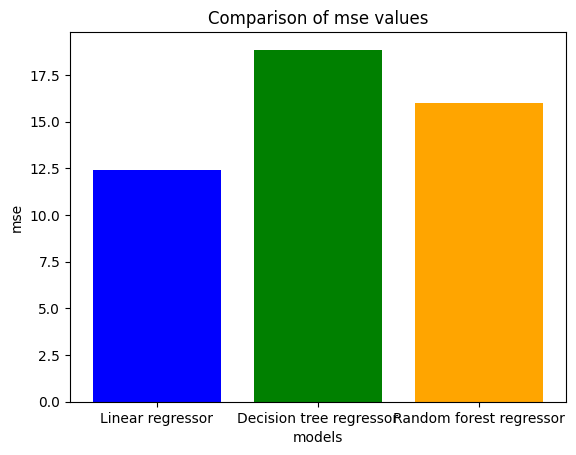

In [63]:
quantities = ['Linear regressor', 'Decision tree regressor', 'Random forest regressor']
values = [mse_linearreg,mse_decisiontree,mse_randforest]
colors = ['blue', 'green', 'orange']

# Plotting the bar graph
plt.bar(quantities, values, color=colors)

# Adding labels and title
plt.xlabel('models')
plt.ylabel('mse')
plt.title('Comparison of mse values')